In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#load the csv file and convert to np.array
pd_shap = pd.read_csv('all_mean_shap.csv',
                      header=0,
                      index_col=0)

all_shap = pd.DataFrame.to_numpy(pd_shap)

#drop cols that contain all 0's
sum_rows = np.sum(all_shap[:,1:], axis=1)
used_cols = np.where(sum_rows != 0)[0]

all_shap = all_shap[used_cols]
print(pd.DataFrame(all_shap))

          0         1         2         3         4         5         6   \
0   0.653970  0.000000  0.017201  0.018608  0.017983  0.017036  0.018017   
1   0.835648  0.022874  0.023482  0.025749  0.000000  0.024165  0.026657   
2   0.941884  0.022320  0.024071  0.025893  0.026208  0.024458  0.000000   
3   1.037036  0.029820  0.031283  0.037455  0.033922  0.025323  0.043887   
4   1.019978  0.029450  0.031814  0.030267  0.037193  0.034435  0.037903   
5   0.988178  0.025178  0.026475  0.030184  0.027311  0.025581  0.033235   
6   0.934631  0.024552  0.026269  0.027940  0.026407  0.025390  0.029133   
7   0.917180  0.023460  0.024512  0.025961  0.025489  0.024297  0.024348   
8   0.870680  0.022470  0.024076  0.025804  0.024999  0.022669  0.026729   
9   0.910949  0.025772  0.026223  0.029460  0.027859  0.023225  0.028829   
10  0.997148  0.027474  0.029125  0.030863  0.029431  0.029907  0.030662   
11  1.155821  0.016056  0.006684  0.015513  0.004389  0.009168  0.020079   
12  1.162988

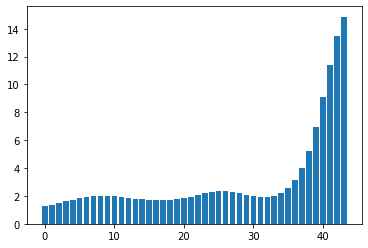

In [4]:
#plot of the mean output value for all channels
pd_yvals = pd.read_csv('y_val.csv', 
                        header=None,
                        index_col=None)

np_yvals = pd.DataFrame.to_numpy(pd_yvals)
sum_yvals = np.sum(np_yvals, axis=0)
counts = np.count_nonzero(np_yvals, axis=0)
avg_coly = sum_yvals/counts


plt.bar(np.arange(0,44), avg_coly)
plt.rcParams["figure.figsize"]=[10,10]

21
           0         1         2         3         4         5         6   \
0    1.246531  0.000000  0.013799  0.014928  0.014426  0.013667  0.014453   
1    1.619679  0.016733  0.017178  0.018836  0.000000  0.017677  0.019500   
2    1.837286  0.014913  0.016082  0.017300  0.017511  0.016341  0.000000   
3    1.988549  0.018411  0.019315  0.023125  0.020944  0.015634  0.027096   
4    2.012385  0.016969  0.018331  0.017439  0.021430  0.019841  0.021839   
5    1.933781  0.013704  0.014410  0.016429  0.014865  0.013923  0.018089   
6    1.806155  0.012741  0.013632  0.014499  0.013703  0.013176  0.015118   
7    1.705269  0.011797  0.012327  0.013055  0.012818  0.012218  0.012244   
8    1.676547  0.011193  0.011992  0.012853  0.012452  0.011292  0.013314   
9    1.760595  0.012806  0.013031  0.014639  0.013844  0.011541  0.014326   
10   1.947888  0.013869  0.014702  0.015580  0.014856  0.015097  0.015478   
11   2.179129  0.008303  0.003456  0.008022  0.002270  0.004741  0.010383

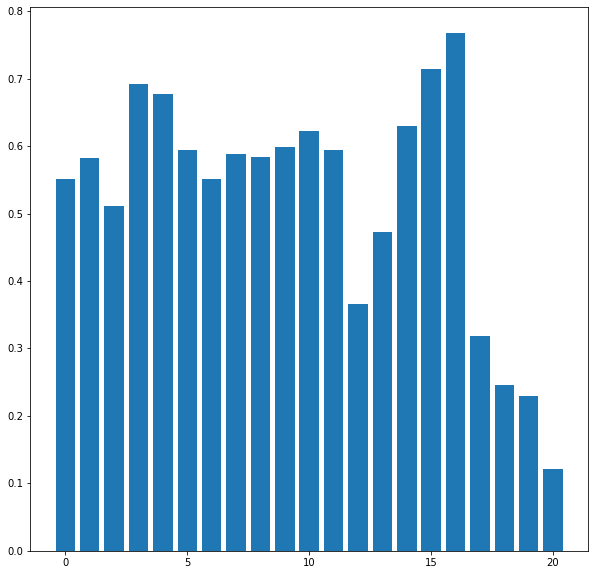

In [40]:
s_cpy = np.copy(all_shap)
s_cpy[:,0] = avg_coly[used_cols]

for row in range(s_cpy.shape[0]):
    s_cpy[row,1:] = s_cpy[row,1:]/avg_coly[row]

sum_cls = np.sum(s_cpy[:,1:], axis=1)


print(s_cpy.shape[0])

plt.bar(np.arange(0,sum_cls.shape[0]), avg_cols)
print(pd.DataFrame(s_cpy))

In [19]:
#this is the sum of the shap values for all channels
per_ch_impact = np.sum(all_shap[:,1:], axis=0)
normalised_ch_shap = per_ch_impact/np.linalg.norm(per_ch_impact)


In [20]:
#list of channel names
ch_names = np.arange(44).tolist()
freqs = np.arange(191.6, 195.9, 0.1).tolist()
for x in range(len(ch_names)):
  ch_names[x] = "Ch %.0f (%.1f)" % (ch_names[x], freqs[x])

(44,)


Text(0.5, 0, 'Channel Number')

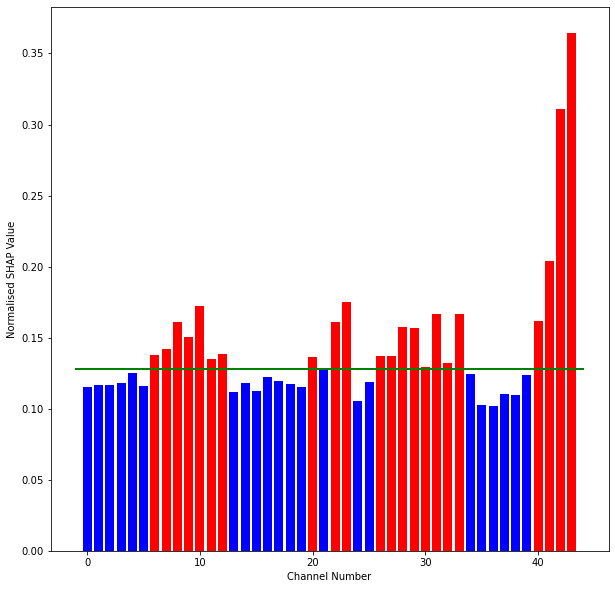

In [21]:
avg = np.median(normalised_ch_shap)


colours = []
for value in normalised_ch_shap:
    if value > avg:
        colours.append('r')
    else:
        colours.append('b')



plt.bar(np.arange(0,44), normalised_ch_shap, color=colours)
plt.plot([-1, 44], [avg, avg],color='green',linewidth=2)
plt.ylabel('Normalised SHAP Value')
plt.xlabel('Channel Number')


Text(0.5, 1.0, 'Occurances in Top 10 SHAP Values')

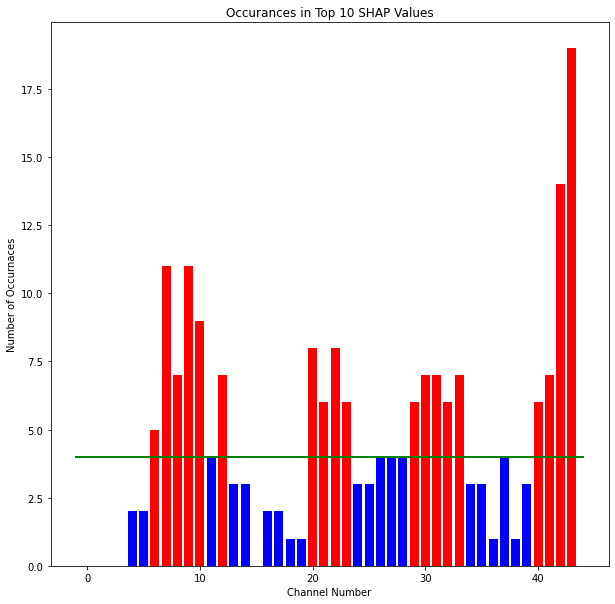

In [186]:
#plotting the number of occurnaces of each channel as one of the 
shap_cols = all_shap[:,1:]
args = np.argsort(-shap_cols)[:,0:10]
count = np.bincount(args.flatten())
med_val = np.median(count)

colours = []
for value in count:
    if value > med_val:
        colours.append('r')
    else:
        colours.append('b')


plt.bar(np.arange(0,44), count, color=colours)
plt.plot([-1, 44], [med_val, med_val],color='green',linewidth=2)
plt.xlabel('Channel Number')
plt.ylabel('Number of Occurnaces')
plt.title('Occurances in Top 10 SHAP Values')

